In [67]:
import matplotlib.pyplot as plt
import numpy as np

def find_local_maxima(values):
    y_maxima = []
    x_maxima = []
    n = len(values)
    for i in range(1, n-1):
        if values[i] > values[i-1] and values[i] > values[i+1]:
            y_maxima.append(values[i])
            x_maxima.append(i)
    
    return y_maxima,x_maxima

def sekanje(data,nt,eps=1e-5):
    intersections_x = []
    intersections_y = []
    for i in range(nt):
        if abs(data[i, 3] - data[i, 5]) < eps and abs(data[i, 4] - data[i, 6]) < eps:
            intersections_x.append(data[i, 3])
            intersections_y.append(data[i, 4])
    return intersections_x, intersections_y

In [68]:
data=np.loadtxt('rezultati.txt', delimiter='\t')

N_cols,N_rows=data.shape

print(f"Stevilo stolpcev = {N_cols}")
print(f"Stevilo vrstic = {N_rows}")
print(f"dt = {data[1,0]-data[0,0]}") #Čas je podan v urah

dt=data[1,0]-data[0,0] #Razmak med dvema podatkoma
dva_meseca=1*30*24

nt=int(dva_meseca/dt) #Število podatkov v dveh mesecih

Stevilo stolpcev = 1011
Stevilo vrstic = 7
dt = 8.666667


# Tir gibanja teles

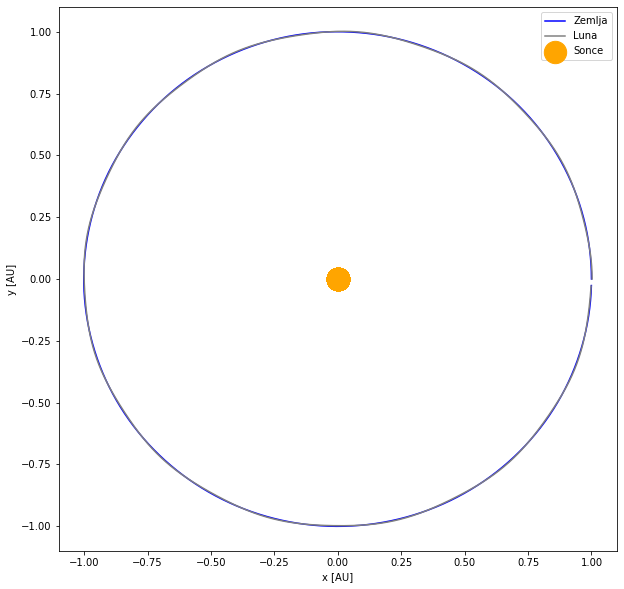

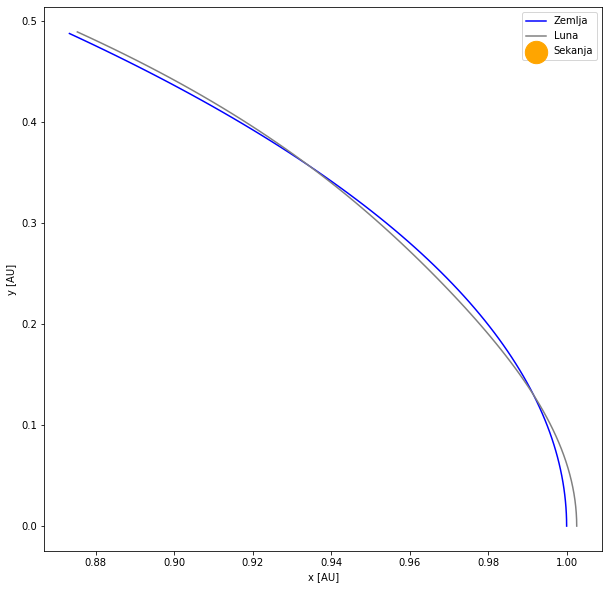

In [69]:
plt.figure(figsize=(10,10))
plt.plot(data[:,3],data[:,4],label='Zemlja',color="blue")
plt.plot(data[:,5],data[:,6],label='Luna',color="gray")
plt.scatter(data[:,1],data[:,2],label='Sonce',s=500,color='orange')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend()
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.show()



intersections_x, intersections_y=sekanje(data,nt,eps=1e-3)

plt.figure(figsize=(10,10))
plt.plot(data[0:nt,3],data[0:nt,4],label='Zemlja',color="blue")
plt.plot(data[0:nt,5],data[0:nt,6],label='Luna',color="gray")
plt.scatter(intersections_x, intersections_y,label='Sekanja',s=100,color='red')
plt.legend()
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.show()

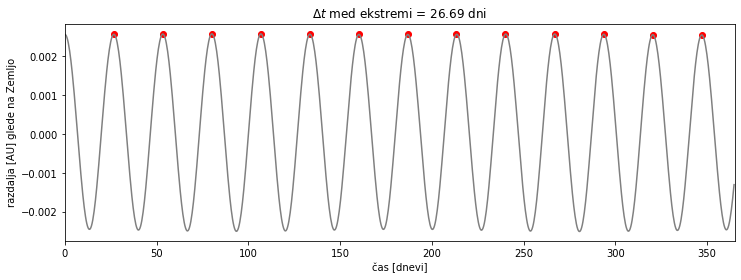

In [58]:
t=data[:,0]/24
y=data[:,5]-data[:,3]

y_ext,x_ext=find_local_maxima(y)

dt=[t[x_ext[i+1]]-t[x_ext[i]] for i in range(len(x_ext)-1)] #dt[i] = t[x_ext[i+1]]-t[x_ext[i

plt.figure(figsize=(12,4))
plt.title(rf"$\Delta t$ med ekstremi = {np.mean(dt):.2f} dni")
plt.plot(t,y,color="gray")
plt.scatter(t[x_ext],y_ext,color="red")
plt.xlim(0,365)
plt.ylabel('razdalja [AU] glede na Zemljo')
plt.xlabel('čas [dnevi]')
plt.show()